In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from functions import load_parameters, timeIntegrationRK4

In [2]:
def plotSpikeTrain(us, params):
    '''
    Spike train as an image. 
    Parameter dictionary is only passed for the image title.
    '''
    fig, ax = plt.subplots(1,1,figsize=(10,5), dpi=100)
    im = ax.pcolormesh(us, cmap='gray')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    fig.colorbar(im, cax = cax)
    ax.set_xlabel('Simulated timesteps [dt={}ms]'.format(params['dt']))
    ax.set_ylabel(r'Activity $u(t)$ for each node')
    ax.set_title(r'Spike trains for $I={}, K={}, \sigma={}, c={}$'.format(params['I'],params['K'],params['sigma'],params['c']))
    plt.show()

## Zeroth Case: Single Node


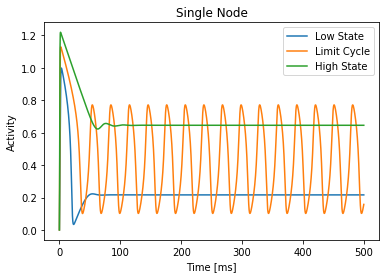

In [3]:
par0LS = load_parameters(singleNode=True)
par0LS['duration']=500; par0LS['I'] = 0.6
ts, xs0LS, _, _,_ = timeIntegrationRK4(par0LS, randomseed=42)
plt.plot(ts, xs0LS[0], label='Low State')
par0LC = load_parameters(singleNode=True)
par0LC['duration']=500; par0LC['I'] = 1.
ts, xs0LC, _, _,_ = timeIntegrationRK4(par0LC, randomseed=42)
plt.plot(ts, xs0LC[0], label='Limit Cycle')
par0HS = load_parameters(singleNode=True)
par0HS['duration']=500; par0HS['I'] = 1.4
ts, xs0HS, _, _,_ = timeIntegrationRK4(par0HS, randomseed=42)
plt.plot(ts, xs0HS[0], label='High State')
plt.xlabel('Time [ms]');plt.ylabel('Activity');plt.title('Single Node')
plt.legend();plt.show()

# "Network Dynamics Playground"
## First Case: No Activity
$K \equiv 0$ (no coupling between the nodes) and  $I_{ext} \equiv 0.6$ (before bifurcation)

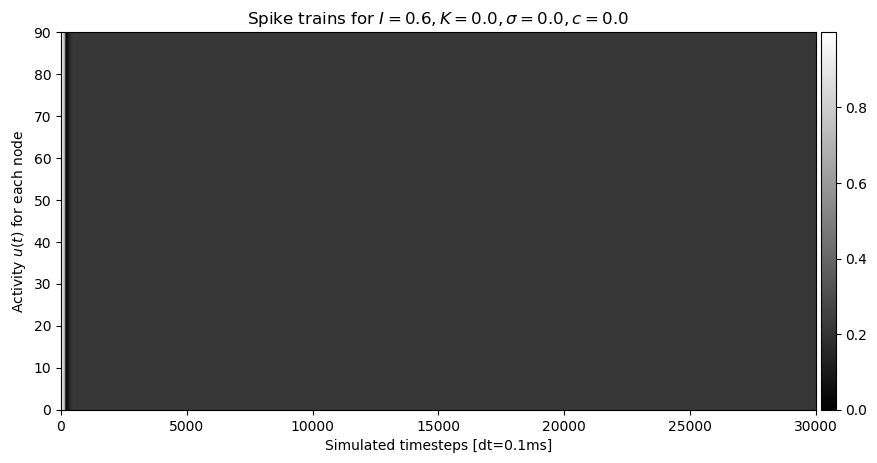

In [4]:
par1 = load_parameters()
par1['I'] = 0.6
par1['K'] = 0.

ts, xs1, ys, _,_ = timeIntegrationRK4(par1, randomseed=42)

plotSpikeTrain(xs1, par1)

## Second Case: Individual Nodes
$K \equiv 0$ (no coupling between the nodes) and  $I_{ext} \equiv 0.8$ (in limit cycle)

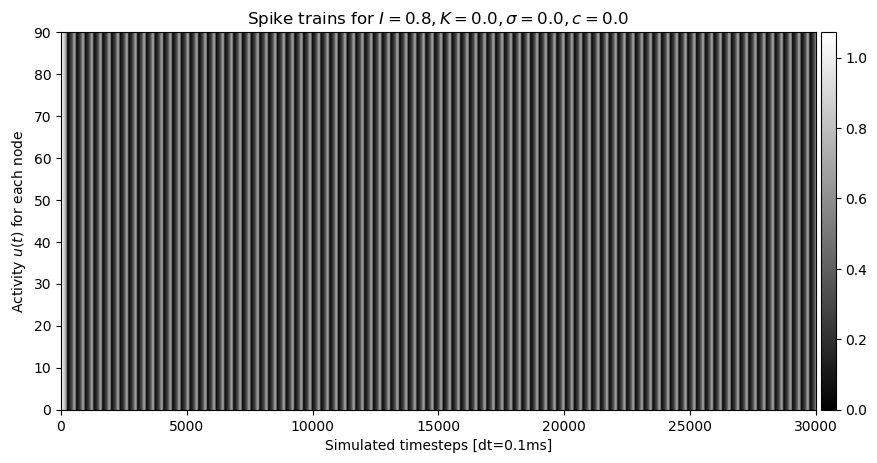

In [5]:
par2 = load_parameters()
par2['I'] = 0.8
par2['K'] = 0.

ts, xs2, ys, _,_ = timeIntegrationRK4(par2, randomseed=42)

plotSpikeTrain(xs2, par2)

## Third (and interesting) Case: Coupling Leads to Activity
$K \equiv 0.5$ (nodes are coupled according to structual connectivity matrix) and  $I_{ext} \equiv 0.6$ (constant background)

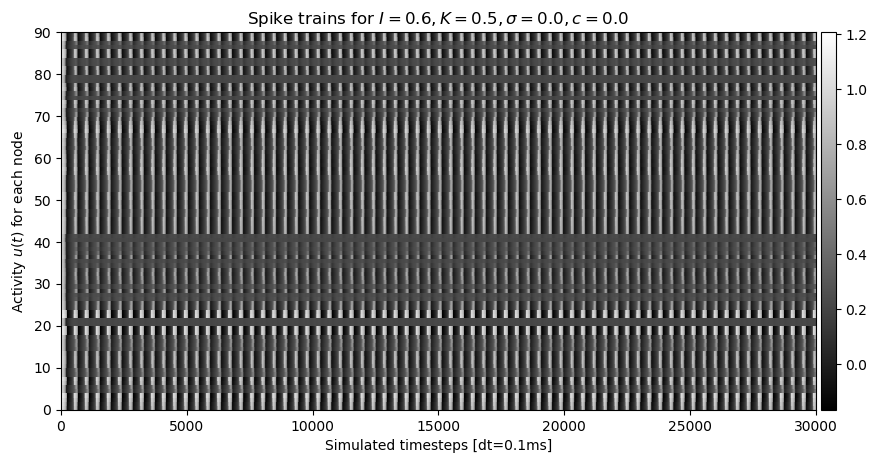

In [6]:
par3 = load_parameters()
par3['I'] = 0.6
par3['K'] = 0.5

ts, xs3, ys, _,_ = timeIntegrationRK4(par3, randomseed=43)

plotSpikeTrain(xs3, par3)

# ...

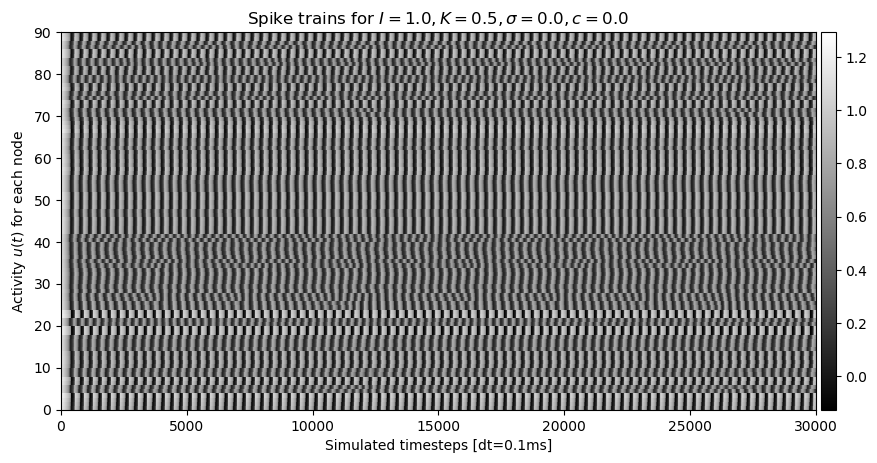

In [7]:
par4 = load_parameters()
par4['I'] = 1.
par4['K'] = 0.5

ts, xs4, ys, _,_ = timeIntegrationRK4(par4, randomseed=43)

plotSpikeTrain(xs4, par4)